In [1]:
import numpy as np
import pandas as pd

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshrau/social-network-ads")

print("Path to dataset files:", path)

# Read the CSV file into a DataFrame
df = pd.read_csv(path + "/Social_Network_Ads.csv")
print(df.head())

Using Colab cache for faster access to the 'social-network-ads' dataset.
Path to dataset files: /kaggle/input/social-network-ads
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

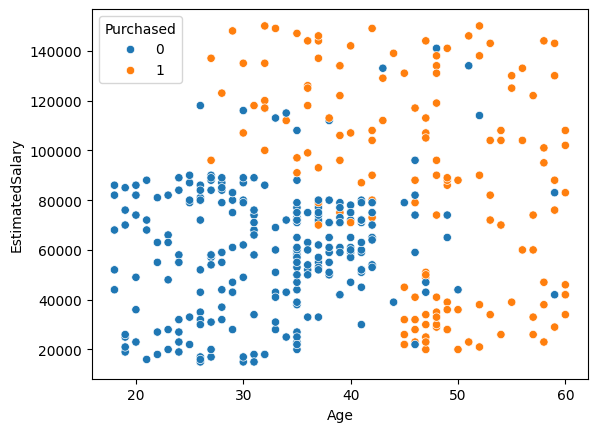

In [8]:
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased')

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
# Fix the feature selection to use Age and EstimatedSalary instead of User ID and Gender
X_correct = df[['Age', 'EstimatedSalary']]
y_correct = df['Purchased']

# Split the data again with correct features
X_train_correct, X_test_correct, y_train_correct, y_test_correct = train_test_split(X_correct, y_correct, test_size=0.2, random_state=2)

# Train the model with correct features
history = model.fit(X_train_correct, y_train_correct, validation_data=(X_test_correct, y_test_correct), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6636 - loss: 3821.8369 - val_accuracy: 0.6000 - val_loss: 667.8429
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3857 - loss: 840.2204 - val_accuracy: 0.4000 - val_loss: 542.3693
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5224 - loss: 299.1644 - val_accuracy: 0.6000 - val_loss: 36.2673
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5107 - loss: 127.8088 - val_accuracy: 0.6000 - val_loss: 213.6360
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5893 - loss: 113.9740 - val_accuracy: 0.6000 - val_loss: 95.6373
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5759 - loss: 69.3293 - val_accuracy: 0.4000 - val_loss: 5.3556
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4861 - loss: 53.9274 - val_accuracy: 0.6000 - val_loss: 29.4182
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4313 - loss: 67.1771 -

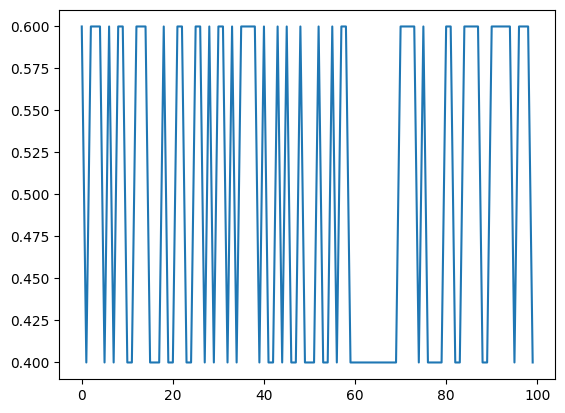

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

### applying scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_correct)
X_test_scaled = scaler.transform(X_test_correct)

In [20]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

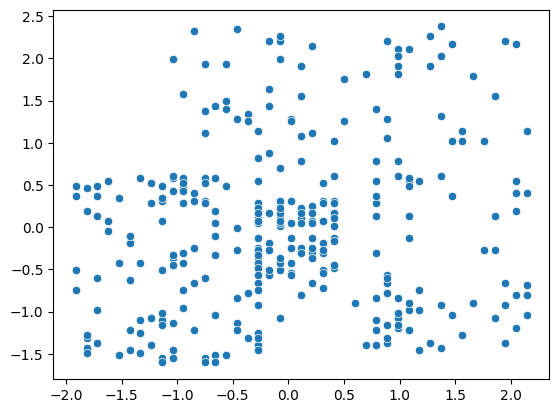

In [22]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [23]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4300 - loss: 0.7059 - val_accuracy: 0.8000 - val_loss: 0.6638
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7486 - loss: 0.6540 - val_accuracy: 0.8125 - val_loss: 0.6127
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8130 - loss: 0.6092 - val_accuracy: 0.8125 - val_loss: 0.5678
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8107 - loss: 0.5791 - val_accuracy: 0.8125 - val_loss: 0.5299
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8304 - loss: 0.5346 - val_accuracy: 0.8000 - val_loss: 0.4966
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8393 - loss: 0.5084 - val_accuracy: 0.7875 - val_loss: 0.4677
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8422 - loss: 0.4702 - val_accuracy: 0.7875 - val_loss: 0.4416
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8374 - loss: 0.4675 - val_accuracy: 0.7875 - val_loss: 0

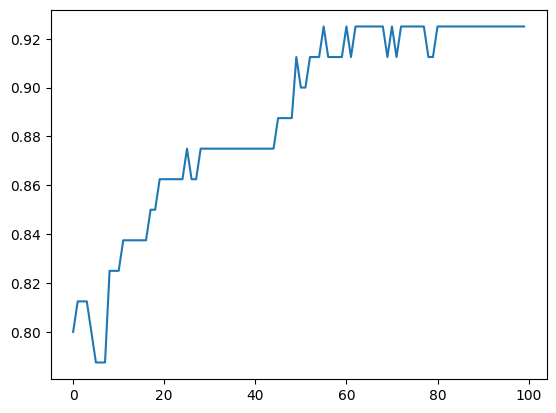

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])